In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

## Service / Problem discovery

RRAM의 동작 특성이 주요 conduction mechanism인 SCLC에 부합하는가를 파악하기 위해 Log-Log scale의 I-V curve의 기울기 분석이 필요하다. 하지만 각 디바이스마다 동작하는 전압 범위도 다르고 기울기 값도 정확히 맞아떨어지지 않기 때문에 자동화된 프로그램 분석이 신뢰성 측면에서 부족함이 있다. 시간적, 인적 소비를 줄이기 위해 오차값을 최대한 줄여 실제 RRAM의 동작 데이터를 수집하여 SCLC 모델에 맞게 RRAM이 동작하는가를 파악한다.

## Data acquisition & refinement

In [2]:
data = pd.read_excel('cleaned_data.xlsx', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,6.600000e-12,1.320000e-11,7.400000e-12,4.600000e-11,2.240000e-11,2.310000e-11,5.400000e-12,4.300000e-12,9.000000e-12,...,1.800000e-11,6.800000e-12,2.600000e-11,9.000000e-12,7.700000e-12,1.700000e-11,8.200000e-12,4.200000e-11,4.390000e-11,2.290000e-10
1,0.1,7.316000e-10,1.359900e-09,1.001000e-09,8.600000e-11,3.355000e-10,1.666000e-10,3.613000e-10,2.471000e-10,1.668000e-10,...,6.940000e-10,1.005800e-09,5.470000e-10,1.607000e-09,1.544000e-09,1.408000e-09,6.525000e-10,2.861700e-09,1.328700e-09,2.739900e-08
2,0.2,1.665300e-09,2.895500e-09,3.636500e-09,3.213000e-10,2.614000e-10,3.438000e-10,8.344000e-10,8.409000e-10,3.507000e-10,...,2.068100e-09,2.832500e-09,1.659600e-09,4.082100e-09,3.716400e-09,3.392400e-09,2.312100e-09,7.366000e-09,4.076000e-09,6.857600e-08
3,0.3,2.826600e-09,5.302600e-09,5.450200e-09,1.054000e-09,7.490000e-10,6.557000e-10,1.760300e-09,1.742200e-09,6.541000e-10,...,4.138100e-09,5.523000e-09,3.018000e-09,7.949300e-09,7.290200e-09,6.612500e-09,5.888000e-09,1.637300e-08,8.360600e-09,1.107770e-07
4,0.4,4.475500e-09,9.819300e-09,8.879300e-09,2.148000e-09,1.246600e-09,1.386400e-09,2.551500e-09,3.402600e-09,1.579700e-09,...,6.854000e-09,9.776900e-09,6.650200e-09,1.397600e-08,1.237740e-08,1.161760e-08,1.364200e-08,2.646010e-08,1.455460e-08,1.531410e-07


In [4]:
x_range = np.array(data[0])[1:]

In [5]:
y_range = np.transpose(np.array(data.drop(columns=[0]))[1:,:])

## Data exploring & analysis

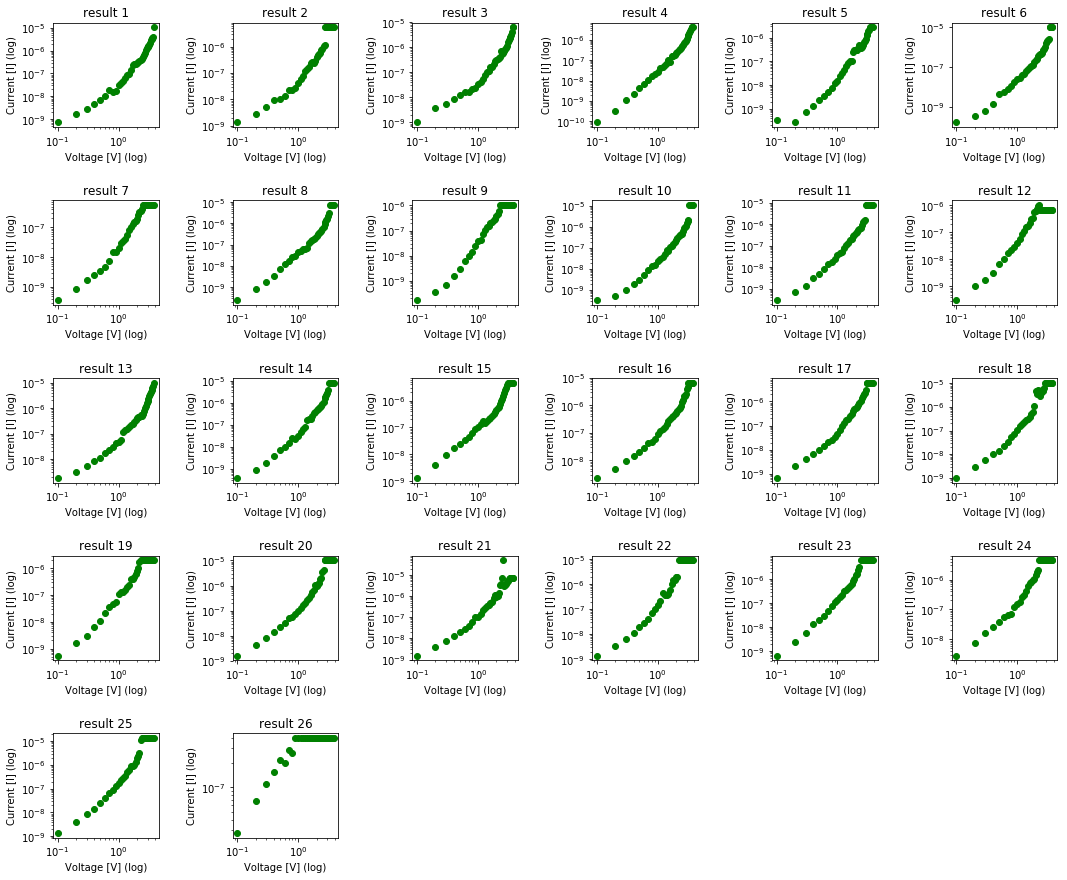

In [6]:
plt.figure(figsize=(18,15))

for i in range(y_range.shape[0]):
    
    plt.subplot(5, 6, i + 1)
    
    plt.title('result {0}'.format(i+1))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Voltage [V] (log)')
    plt.ylabel('Current [I] (log)')
    plt.plot(x_range, y_range[i], 'o', color = 'green')
    plt.subplots_adjust(hspace = 0.7, wspace = 0.7)

In [7]:
def linear_fit(x, a, b):
    return a * x + b

In [8]:
def calculate_slope(x,y):
    log_x_range = np.log10(x)
    log_y_range = np.log10(y)

    for idx in range(len(log_x_range) - 1):
        slope = (log_y_range[idx + 1] - log_y_range[idx]) / (log_x_range[idx + 1] - log_x_range[idx])

        print(idx, '기울기 = {0}'.format(slope))

In [9]:
result_num = 0

In [10]:
calculate_slope(x_range, y_range[result_num])

0 기울기 = 1.1866551187340146
1 기울기 = 1.3048454182368006
2 기울기 = 1.597400552145881
3 기울기 = 1.91370555481433
4 기울기 = 2.034526342980707
5 기울기 = 4.405268079716688
6 기울기 = -1.725290572235141
7 기울기 = 1.1159648631209993
8 기울기 = 5.350758819216072
9 기울기 = 2.34424771445704
10 기울기 = 1.7518823093508489
11 기울기 = 4.45773505745775
12 기울기 = 3.4283934637874864
13 기울기 = 2.1971677710391515
14 기울기 = 6.163555481055852
15 기울기 = 7.150666590746428
16 기울기 = 2.8566197450535786
17 기울기 = -0.09951392206401054
18 기울기 = 0.99562638455915
19 기울기 = 3.1235366047207247
20 기울기 = 2.471175909115065
21 기울기 = 1.8620549494911494
22 기울기 = 2.885053153458871
23 기울기 = 4.176861331323259
24 기울기 = 4.1256418327736055
25 기울기 = 7.5944892648041264
26 기울기 = 8.361337528816003
27 기울기 = 4.12174703579417
28 기울기 = 3.7558616188167107
29 기울기 = 3.4004805624588657
30 기울기 = 1.8089289003650235
31 기울기 = 8.228190183770993
32 기울기 = 8.677309115922986
33 기울기 = 6.322472494851823
34 기울기 = -1.447353619917452
35 기울기 = 7.549928071467527
36 기울기 = 34.692980118108

In [11]:
first, second = 5, 14

구간 1: 1.367421525683073
구간 2: 2.355024203009442
구간 3: 4.151313832160676


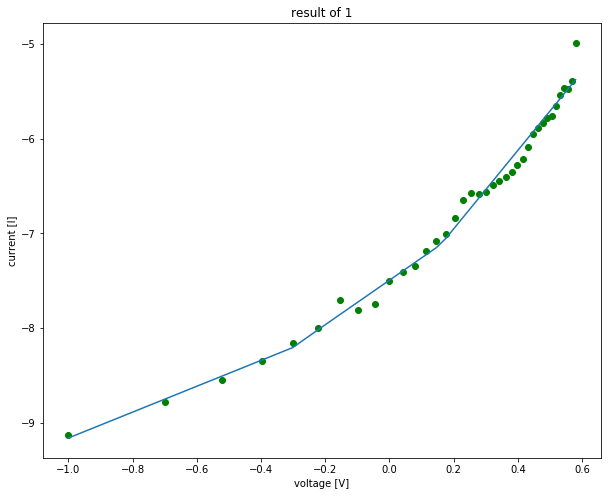

In [12]:
log_x = np.log10(x_range)
log_y = np.log10(y_range[result_num])

fit_a, fit_b = curve_fit(linear_fit, log_x[:first], log_y[:first])[0]
y_fit = fit_a * log_x[:first] + fit_b
print('구간 1: ' + str(fit_a))

fit_a, fit_b = curve_fit(linear_fit, log_x[first:second], log_y[first:second])[0]
y_fit = np.append(y_fit, fit_a * log_x[first:second] + fit_b)
print('구간 2: ' + str(fit_a))

fit_a, fit_b = curve_fit(linear_fit, log_x[second:], log_y[second:])[0]
y_fit = np.append(y_fit, fit_a * log_x[second:] + fit_b)
print('구간 3: ' + str(fit_a))

plt.figure(figsize=(10,8))
plt.title('result of {0}'.format(result_num + 1))
plt.xlabel('voltage [V]')
plt.ylabel('current [I]')
plt.plot(log_x, log_y, 'o', color = 'green')
plt.plot(log_x, y_fit)
#plt.savefig('team_result/{0}번.png'.format(result_num + 1))